<a href="https://colab.research.google.com/github/tarushirastogi/ML-project/blob/main/fakenewsprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df.shape

(20800, 5)

In [ ]:
# data preprocessing
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
df = df.dropna(subset = 'text')

In [ ]:
df.shape

(20761, 5)

In [ ]:
mssg = df.copy()
mssg.reset_index(drop = True , inplace = True)

In [ ]:
mssg.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [ ]:
mssg['label'].value_counts()   #balanced dataset

0    10387
1    10374
Name: label, dtype: int64

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import re

In [ ]:
def processing(data):
  temp = re.sub('[^a-zA-Z]',' ',data)   #removing punctuations
  temp = temp.lower()
  temp = temp.split()
  temp = [lemmatizer.lemmatize(word) for word in temp if word not in stopwords.words('english')]
  return ' '.join(temp)


In [ ]:
mssg['text'] = mssg['text'].apply(processing)

In [ ]:
mssg['text'][10]   #processed text

'organizing action activist group morphed barack obama first presidential campaign partnered indivisible project online training protest president donald trump agenda last week breitbart news extensively reported indivisible leader openly associated group financed billionaire george soros politico earlier month profiled indivisible article titled inside protest movement republican reeling news agency left soros link failed note organization cited article helping amplify indivisible message either financed directly soros close tie group funded billionaire breitbart news documented organizing action ofa community organizing project sprung obama campaign organization organizing america becoming nonprofit described washington post advocate ing president policy recent facebook post titled take deep breath take action ofa called constituent lobby particularly hard february lawmaker home district post included link guide released indivisible organize trump stay tuned online training invitatio

In [ ]:
df['text'][10]   # original text

'Organizing for Action, the activist group that morphed from Barack Obama’s first presidential campaign, has partnered with the   Indivisible Project for “online trainings” on how to protest President Donald Trump’s agenda. [Last week, Breitbart News extensively reported that Indivisible leaders are openly associated with groups financed by billionaire George Soros.  Politico earlier this month profiled Indivisible in an article titled, “Inside the protest movement that has Republicans reeling. ”  The news agency not only left out the Soros links, but failed to note that the organizations cited in its article as helping to amplify Indivisible’s message are either financed directly by Soros or have close ties to groups funded by the billionaire, as Breitbart News documented. Organizing for Action (OFA) is a   community organizing project that sprung from Obama’s 2012 campaign organization, Organizing for America, becoming a nonprofit described by the Washington Post as “advocate[ing] fo

In [ ]:
X = mssg['text']
Y = mssg['label']


In [ ]:
X.head(6)


0    house dem aide even see comey letter jason cha...
1    ever get feeling life circle roundabout rather...
2    truth might get fired october tension intellig...
3    video civilian killed single u airstrike ident...
4    print iranian woman sentenced six year prison ...
5    trying time jackie mason voice reason week exc...
Name: text, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features =5000)
X_tfidf = vectorizer.fit_transform(X)


In [ ]:
X_tfidf

<20761x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 4162303 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_tfidf,Y,test_size = 0.2,random_state = 42)

In [ ]:
print(X_train)
print(Y_train)

  (0, 4922)	0.10762202469025749
  (0, 398)	0.03475306927736285
  (0, 116)	0.03346871491788004
  (0, 3124)	0.030925668364964354
  (0, 629)	0.06555651308367481
  (0, 1535)	0.02715829761831536
  (0, 1969)	0.024914163099622046
  (0, 4814)	0.031198206845226586
  (0, 1207)	0.03182087201392321
  (0, 4891)	0.026980336055821987
  (0, 3707)	0.035006636872765735
  (0, 4552)	0.02840510414692227
  (0, 243)	0.03576322788659287
  (0, 2535)	0.09981111159774675
  (0, 2218)	0.04717759586044924
  (0, 490)	0.032137244969876334
  (0, 3187)	0.03583685921843087
  (0, 1259)	0.030992678758284226
  (0, 2810)	0.05614305456799106
  (0, 3003)	0.03244940047267139
  (0, 2853)	0.025376059905741058
  (0, 1184)	0.16876163669129451
  (0, 4360)	0.030975857563869426
  (0, 967)	0.06113924757698453
  (0, 3004)	0.055176564330042116
  :	:
  (16607, 3719)	0.024537060541105448
  (16607, 2759)	0.02904636572549779
  (16607, 1469)	0.24225100627042803
  (16607, 2651)	0.022061612830837053
  (16607, 4894)	0.014835357802539494
  (1660

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train,Y_train)


LogisticRegression()

In [ ]:
#accuracy score on testing data
Y_predict = model.predict(X_test)
test_acc = accuracy_score(Y_predict,Y_test)

In [ ]:
print(Y_predict)
print(test_acc)


[1 1 1 ... 1 0 1]
0.9422104502769083


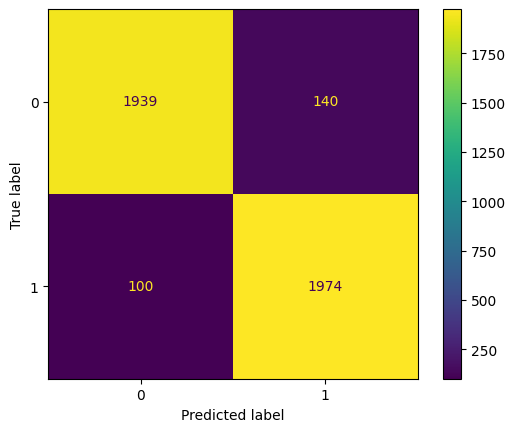

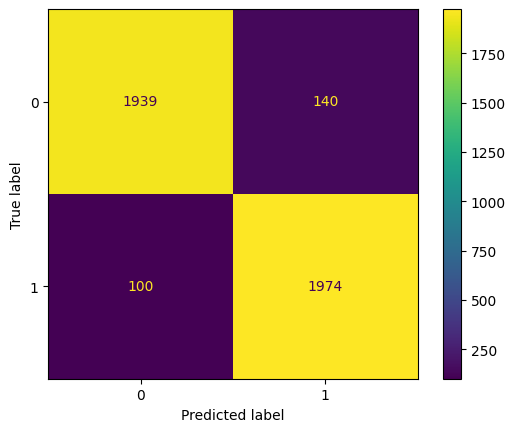

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = ConfusionMatrixDisplay.from_predictions(Y_test,Y_predict)
cm.plot()
plt.show()

In [ ]:
#test data points

test_data = pd.read_csv("/content/drive/MyDrive/test.csv")
test_data.head()


,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [ ]:
test_data.shape

(5200, 4)

In [ ]:
test_data.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [ ]:
test_data = test_data.dropna(subset = 'text')
test_data.reset_index(drop = True,inplace= True)

In [ ]:
test_data.shape

(5193, 4)

In [ ]:
test_data['text'] = test_data['text'].apply(processing)

In [ ]:
test_data['text'][6]

'sunday nbc meet press house minority leader rep nancy pelosi called fbi investigation find russian president donald trump pelosi said want know russian donald trump think investigation fbi financial personal political connection russia want see tax return truth relationship putin admires follow pam key twitter pamkeynen'

In [ ]:
#applying Tfidf vectorizer
test_tfidf = vectorizer.fit_transform(test_data['text'])

In [ ]:
test_y = model.predict(test_tfidf)
test_data['predicted_label'] = test_y

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/test.csv")

In [ ]:
df_test = df_test.dropna(subset = 'text')
df_test.reset_index(drop = True,inplace= True)

In [ ]:
df_test['predicted_label'] = test_data['predicted_label']

In [ ]:
df_test.to_csv('predicted_output.csv',index = False)